In [42]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import warnings

# T·∫Øt c√°c c·∫£nh b√°o kh√¥ng c·∫ßn thi·∫øt
warnings.filterwarnings("ignore")

# Th∆∞ vi·ªán ti·ªÅn x·ª≠ l√Ω
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# C√°c m√¥ h√¨nh
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# C√°c ch·ªâ s·ªë ƒë√°nh gi√°
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)

# C√†i ƒë·∫∑t hi·ªÉn th·ªã
# %matplotlib inline # B·ªè d√≤ng n√†y n·∫øu ch·∫°y d∆∞·ªõi d·∫°ng script
sns.set(style="whitegrid", palette="muted", font_scale=1.2)


In [44]:
df_train_full = pd.read_csv(
    r"D:\Workspace\Mon_Hoc\Mon_hoc\KPDL_TEAM\Tri_Duy_Dat\final_of_final\final_data\final_data_train.csv"
)
df_test_final = pd.read_csv(
    r"D:\Workspace\Mon_Hoc\Mon_hoc\KPDL_TEAM\Tri_Duy_Dat\final_of_final\final_data\final_data_test.csv"
)

df_train_full.head()
df_test_final.head()


PassengerId  Pclass   Age     Fare  FamilySize  IsAlone  HasCabin  \
0            1     3.0  22.0   7.2500         2.0      0.0       0.0   
1            2     1.0  38.0  71.2833         2.0      0.0       1.0   
2            3     3.0  26.0   7.9250         1.0      1.0       0.0   
3            4     1.0  35.0  53.1000         2.0      0.0       1.0   
4            5     3.0  35.0   8.0500         1.0      1.0       0.0   

   Sex_male  Embarked_Q  Embarked_S  ...  Title_Rare  Deck_B  Deck_C  Deck_D  \
0       1.0         0.0         1.0  ...         0.0     0.0     0.0     0.0   
1       0.0         0.0         0.0  ...         0.0     0.0     1.0     0.0   
2       0.0         0.0         1.0  ...         0.0     0.0     0.0     0.0   
3       0.0         0.0         1.0  ...         0.0     0.0     1.0     0.0   
4       1.0         0.0         1.0  ...         0.0     0.0     0.0     0.0   

   Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  Survived  
0     0.0     0.0     0.0     0.0     1.0         0  
1     0.0     0.0     0.0     0.0     0.0         1  
2     0.0     0.0     0.0     0.0     1.0         1  
3     0.0     0.0     0.0     0.0     0.0         1  
4     0.0     0.0     0.0     0.0     1.0         0  

[5 rows x 23 columns]

PassengerId  Pclass   Age     Fare  FamilySize  IsAlone  HasCabin  \
0          892     3.0  34.5   7.8292         1.0      1.0       0.0   
1          893     3.0  47.0   7.0000         2.0      0.0       0.0   
2          894     2.0  62.0   9.6875         1.0      1.0       0.0   
3          895     3.0  27.0   8.6625         1.0      1.0       0.0   
4          896     3.0  22.0  12.2875         3.0      0.0       0.0   

   Sex_male  Embarked_Q  Embarked_S  ...  Title_Mrs  Title_Rare  Deck_B  \
0       1.0         1.0         0.0  ...        0.0         0.0     0.0   
1       0.0         0.0         1.0  ...        1.0         0.0     0.0   
2       1.0         1.0         0.0  ...        0.0         0.0     0.0   
3       1.0         0.0         1.0  ...        0.0         0.0     0.0   
4       0.0         0.0         1.0  ...        1.0         0.0     0.0   

   Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     1.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     1.0  

[5 rows x 22 columns]

In [45]:
# 1. ƒê·ªäNH NGHƒ®A C·ªòT TARGET
TARGET_COLUMN = "Survived"

if TARGET_COLUMN not in df_train_full.columns:
    print(f"L·ªñI: C·ªôt target '{TARGET_COLUMN}' kh√¥ng t√¨m th·∫•y trong train_cleaned.csv")
    raise KeyError(f"Kh√¥ng t√¨m th·∫•y c·ªôt {TARGET_COLUMN}")

# 2. T√°ch X v√† y t·ª´ t·∫≠p train ƒë·∫ßy ƒë·ªß
print("T√°ch X v√† y t·ª´ t·∫≠p train...")
X = df_train_full.drop(TARGET_COLUMN, axis=1)
y = df_train_full[TARGET_COLUMN]

# 3. T√°ch th√†nh t·∫≠p train/validation
# Ch√∫ng ta s·∫Ω d√πng 20% d·ªØ li·ªáu train ƒë·ªÉ l√†m validation
print("T√°ch d·ªØ li·ªáu train/validation...")
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,  # stratify=y r·∫•t quan tr·ªçng ƒë·ªÉ gi·ªØ t·ª∑ l·ªá ph√¢n b·ªï c·ªßa 'Survived'
)

# 4. T·∫≠p test cu·ªëi c√πng (ƒë·∫£m b·∫£o c√°c c·ªôt kh·ªõp nhau)
# Gi·∫£ ƒë·ªãnh df_test_final c√≥ c√°c c·ªôt features gi·ªëng h·ªát X
# N·∫øu df_test_final c√≥ c·ªôt ID (v√≠ d·ª•: PassengerId) m√† X kh√¥ng c√≥, b·∫°n c·∫ßn lo·∫°i b·ªè n√≥
# V√≠ d·ª•: X_test_final = df_test_final.drop('PassengerId', axis=1)
# ·ªû ƒë√¢y, ta gi·∫£ ƒë·ªãnh c√°c c·ªôt ƒë√£ kh·ªõp
X_test_final = df_test_final.copy()

# ƒê·∫£m b·∫£o th·ª© t·ª± c·ªôt c·ªßa X_test_final gi·ªëng h·ªát X_train
try:
    X_test_final = X_test_final[X_train.columns]
except KeyError:
    print("L·ªñI: C√°c c·ªôt c·ªßa test_cleaned.csv kh√¥ng kh·ªõp v·ªõi train_cleaned.csv")
    print(f"C·ªôt c·ªßa Train: {X_train.columns.tolist()}")
    print(f"C·ªôt c·ªßa Test: {X_test_final.columns.tolist()}")
    raise

# 5. Chu·∫©n h√≥a (Scaling)
print("ƒêang chu·∫©n h√≥a d·ªØ li·ªáu (scaling)...")
scaler = StandardScaler()

# Ch·ªâ fit tr√™n X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_val v√† X_test_final
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

print("Chu·∫©n b·ªã d·ªØ li·ªáu ho√†n t·∫•t.")
print(f"K√≠ch th∆∞·ªõc X_train: {X_train_scaled.shape}")
print(f"K√≠ch th∆∞·ªõc X_val: {X_val_scaled.shape}")
print(f"K√≠ch th∆∞·ªõc X_test_final: {X_test_final_scaled.shape}")


T√°ch X v√† y t·ª´ t·∫≠p train...
T√°ch d·ªØ li·ªáu train/validation...
ƒêang chu·∫©n h√≥a d·ªØ li·ªáu (scaling)...
Chu·∫©n b·ªã d·ªØ li·ªáu ho√†n t·∫•t.
K√≠ch th∆∞·ªõc X_train: (712, 22)
K√≠ch th∆∞·ªõc X_val: (179, 22)
K√≠ch th∆∞·ªõc X_test_final: (418, 22)


In [46]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Naive Bayes": GaussianNB(),
}

# Dictionary ƒë·ªÉ l∆∞u c√°c m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
trained_models = {}


B·∫ÆT ƒê·∫¶U QU√Å TR√åNH HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å (BASELINE)...
--- 1. ƒêang hu·∫•n luy·ªán: Logistic Regression ---


LogisticRegression(random_state=42)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Logistic Regression ---
Ho√†n th√†nh trong 0.0084 gi√¢y.
Validation Accuracy: 0.8436

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.81      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Logistic Regression')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

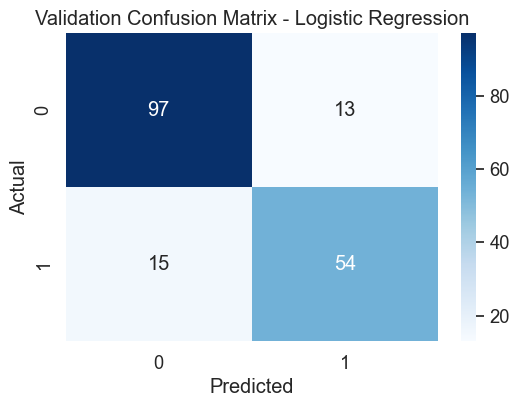

--- 1. ƒêang hu·∫•n luy·ªán: Decision Tree ---


DecisionTreeClassifier(random_state=42)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Decision Tree ---
Ho√†n th√†nh trong 0.0057 gi√¢y.
Validation Accuracy: 0.7598

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       110
           1       0.67      0.75      0.71        69

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.76      0.76       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Decision Tree')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

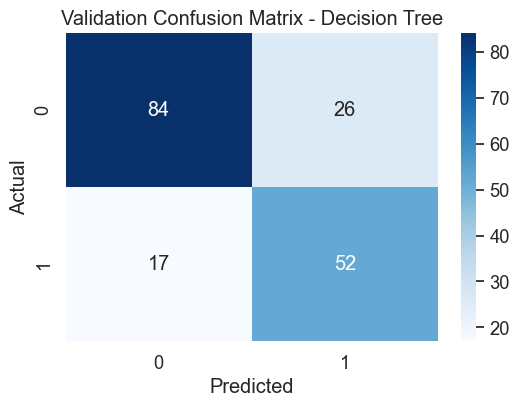

--- 1. ƒêang hu·∫•n luy·ªán: Random Forest ---


RandomForestClassifier(random_state=42)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Random Forest ---
Ho√†n th√†nh trong 0.0910 gi√¢y.
Validation Accuracy: 0.7821

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Random Forest')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

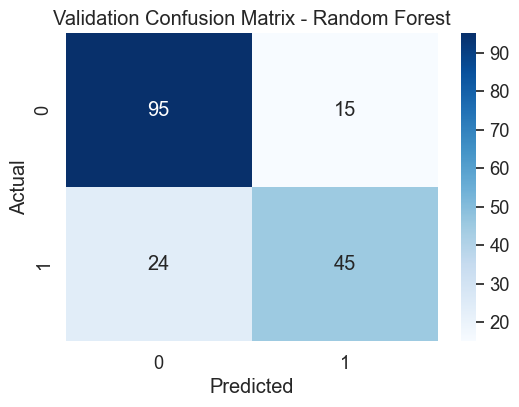

--- 1. ƒêang hu·∫•n luy·ªán: Gradient Boosting ---


GradientBoostingClassifier(random_state=42)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Gradient Boosting ---
Ho√†n th√†nh trong 0.0943 gi√¢y.
Validation Accuracy: 0.8045

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.78      0.68      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Gradient Boosting')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

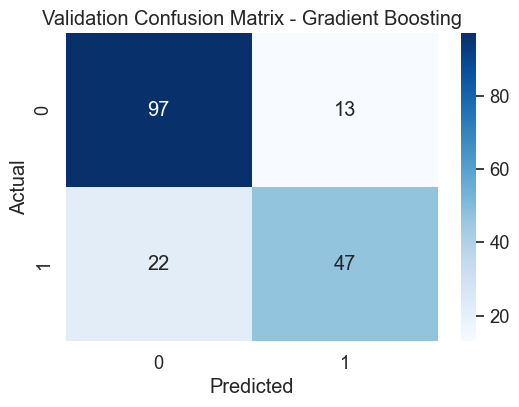

--- 1. ƒêang hu·∫•n luy·ªán: KNN ---


KNeighborsClassifier()

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): KNN ---
Ho√†n th√†nh trong 0.0041 gi√¢y.
Validation Accuracy: 0.7989

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - KNN')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

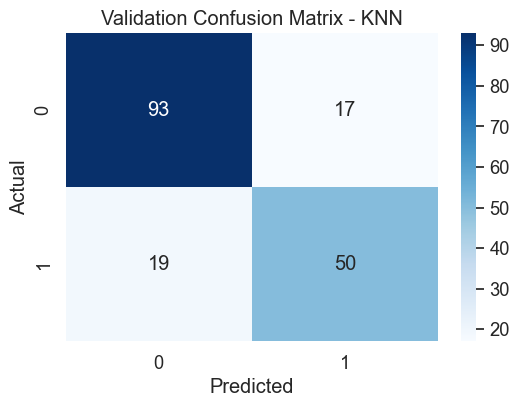

--- 1. ƒêang hu·∫•n luy·ªán: Support Vector Machine ---


SVC(random_state=42)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Support Vector Machine ---
Ho√†n th√†nh trong 0.0133 gi√¢y.
Validation Accuracy: 0.8101

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Support Vector Machine')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

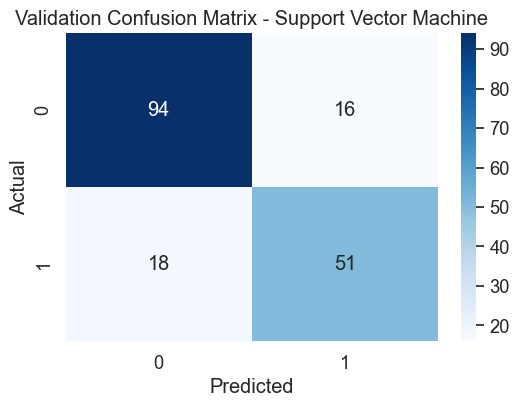

--- 1. ƒêang hu·∫•n luy·ªán: Naive Bayes ---


GaussianNB()

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Naive Bayes ---
Ho√†n th√†nh trong 0.0035 gi√¢y.
Validation Accuracy: 0.6592

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       110
           1       0.54      0.87      0.66        69

    accuracy                           0.66       179
   macro avg       0.70      0.70      0.66       179
weighted avg       0.74      0.66      0.66       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Naive Bayes')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

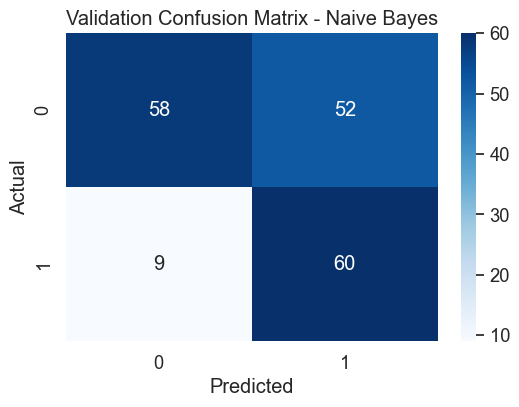

ƒê√É HO√ÄN T·∫§T ƒê√ÅNH GI√Å T·∫§T C·∫¢ C√ÅC M√î H√åNH (BASELINE)!

üìä K·∫æT QU·∫¢ BASELINE:
                 Model  Accuracy  Precision   Recall  F1-Score  Training Time (s)
   Logistic Regression  0.843575   0.842904 0.843575  0.843130           0.008395
         Decision Tree  0.759777   0.768073 0.759777  0.762007           0.005660
         Random Forest  0.782123   0.779693 0.782123  0.778804           0.091000
     Gradient Boosting  0.804469   0.802871 0.804469  0.801491           0.094339
                   KNN  0.798883   0.797943 0.798883  0.798310           0.004069
Support Vector Machine  0.810056   0.809183 0.810056  0.809515           0.013268
           Naive Bayes  0.659218   0.738481 0.659218  0.658303           0.003497


In [47]:
print("B·∫ÆT ƒê·∫¶U QU√Å TR√åNH HU·∫§N LUY·ªÜN V√Ä ƒê√ÅNH GI√Å (BASELINE)...")
print("=" * 60)

baseline_evaluation_log = []

for name, model in models.items():
    print(f"--- 1. ƒêang hu·∫•n luy·ªán: {name} ---")

    # 1. Hu·∫•n luy·ªán m√¥ h√¨nh
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # L∆∞u m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    trained_models[name] = model

    # 2. ƒê√°nh gi√° tr√™n t·∫≠p VALIDATION
    print(f"--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): {name} ---")
    y_pred_val = model.predict(X_val_scaled)

    # 3. T√≠nh to√°n c√°c ch·ªâ s·ªë
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average="weighted")
    recall = recall_score(y_val, y_pred_val, average="weighted")
    f1 = f1_score(y_val, y_pred_val, average="weighted")

    # 4. Ghi l·∫°i k·∫øt qu·∫£ (Nh·∫≠t k√Ω)
    baseline_evaluation_log.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Training Time (s)": training_time,
        }
    )

    # 5. In b√°o c√°o chi ti·∫øt v√† Confusion Matrix
    print(f"Ho√†n th√†nh trong {training_time:.4f} gi√¢y.")
    print(f"Validation Accuracy: {accuracy:.4f}")

    print("\nValidation Classification Report:")
    print(classification_report(y_val, y_pred_val))

    # (T√πy ch·ªçn) V·∫Ω Confusion Matrix cho t·∫≠p validation
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Validation Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("=" * 60)

print("ƒê√É HO√ÄN T·∫§T ƒê√ÅNH GI√Å T·∫§T C·∫¢ C√ÅC M√î H√åNH (BASELINE)!")

# L∆∞u k·∫øt qu·∫£ baseline v√†o DataFrame
df_baseline = pd.DataFrame(baseline_evaluation_log)
print("\nüìä K·∫æT QU·∫¢ BASELINE:")
print(df_baseline.to_string(index=False))


In [48]:
# ƒê·ªãnh nghƒ©a l∆∞·ªõi si√™u tham s·ªë cho t·ª´ng m√¥ h√¨nh
param_grids = {
    "Logistic Regression": {"C": [0.1, 1.0, 10.0], "solver": ["liblinear", "lbfgs"]},
    "Decision Tree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_leaf": [1, 2, 5],
        "criterion": ["gini", "entropy"],
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_leaf": [1, 2],
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["minkowski", "manhattan"],
    },
    "Support Vector Machine": {
        "C": [0.1, 1.0, 10.0],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"],
    },
    "Naive Bayes": {"var_smoothing": [1e-9, 1e-8, 1e-7]},
}


B·∫ÆT ƒê·∫¶U QU√Å TR√åNH T·ªêI ∆ØU H√ìA V√Ä ƒê√ÅNH GI√Å (TUNED)...
--- 1. ƒêang t·ªëi ∆∞u h√≥a: Logistic Regression ---
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Logistic Regression ---
Ho√†n th√†nh trong 0.0595 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'C': 0.1, 'solver': 'liblinear'}

Validation Accuracy: 0.8045

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Logistic Regression (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

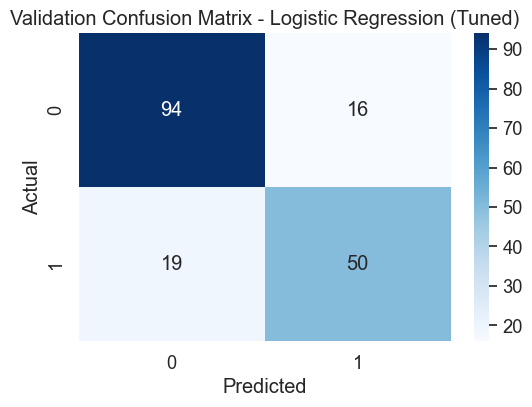

--- 1. ƒêang t·ªëi ∆∞u h√≥a: Decision Tree ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Decision Tree ---
Ho√†n th√†nh trong 0.0845 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}

Validation Accuracy: 0.7877

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.80      0.59      0.68        69

    accuracy                           0.79       179
   macro avg       0.79      0.75      0.76       179
weighted avg       0.79      0.79      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Decision Tree (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

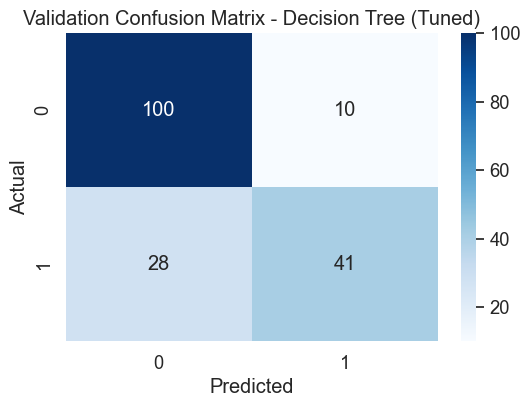

--- 1. ƒêang t·ªëi ∆∞u h√≥a: Random Forest ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Random Forest ---
Ho√†n th√†nh trong 1.1188 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}

Validation Accuracy: 0.7765

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       110
           1       0.75      0.64      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Random Forest (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

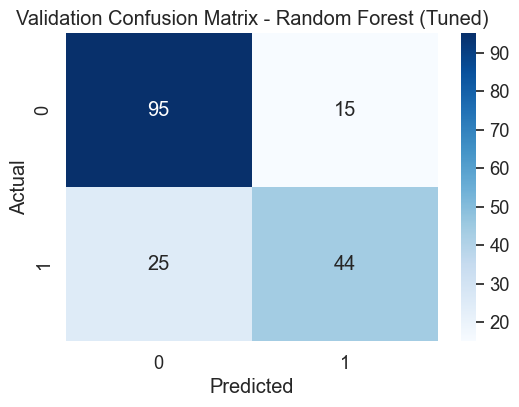

--- 1. ƒêang t·ªëi ∆∞u h√≥a: Gradient Boosting ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Gradient Boosting ---
Ho√†n th√†nh trong 1.0935 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

Validation Accuracy: 0.8101

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Gradient Boosting (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

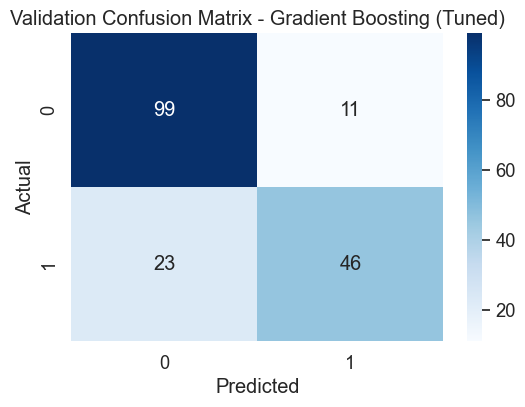

--- 1. ƒêang t·ªëi ∆∞u h√≥a: KNN ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): KNN ---
Ho√†n th√†nh trong 0.0504 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Validation Accuracy: 0.7709

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       110
           1       0.71      0.70      0.70        69

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - KNN (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

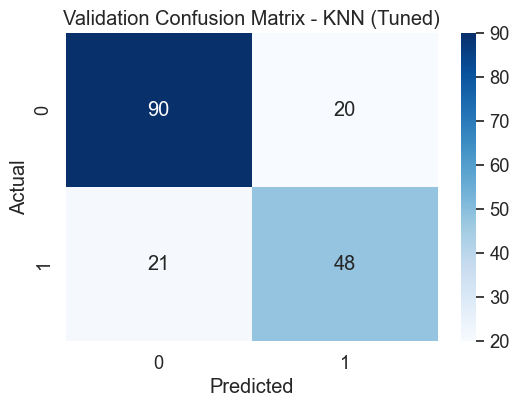

--- 1. ƒêang t·ªëi ∆∞u h√≥a: Support Vector Machine ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Support Vector Machine ---
Ho√†n th√†nh trong 0.1687 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

Validation Accuracy: 0.7877

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Support Vector Machine (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

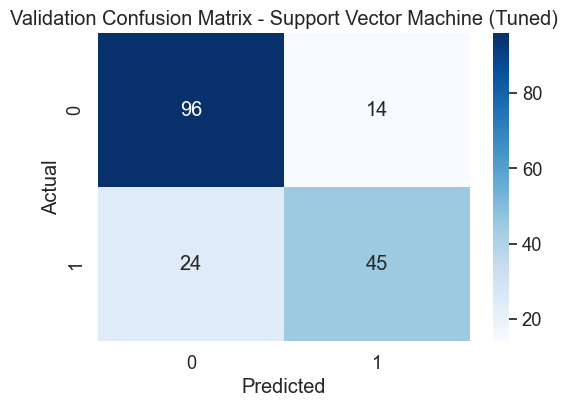

--- 1. ƒêang t·ªëi ∆∞u h√≥a: Naive Bayes ---
Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='f1_weighted', verbose=1)

--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): Naive Bayes ---
Ho√†n th√†nh trong 0.0269 gi√¢y.
C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: 
{'var_smoothing': 1e-07}

Validation Accuracy: 0.7430

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       110
           1       0.62      0.86      0.72        69

    accuracy                           0.74       179
   macro avg       0.75      0.76      0.74       179
weighted avg       0.78      0.74      0.75       179



<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Validation Confusion Matrix - Naive Bayes (Tuned)')

Text(0.5, 7.249999999999995, 'Predicted')

Text(38.25, 0.5, 'Actual')

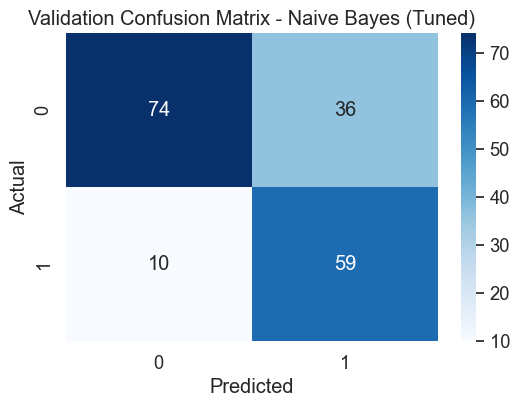

ƒê√É HO√ÄN T·∫§T T·ªêI ∆ØU H√ìA V√Ä ƒê√ÅNH GI√Å T·∫§T C·∫¢ C√ÅC M√î H√åNH (TUNED)!

üìä K·∫æT QU·∫¢ SAU T·ªêI ∆ØU H√ìA:
                 Model  Accuracy  Precision   Recall  F1-Score  Best F1 (CV)  Training Time (s)
   Logistic Regression  0.804469   0.803224 0.804469  0.803612      0.817368           0.059455
         Decision Tree  0.787709   0.789989 0.787709  0.779816      0.812518           0.084472
         Random Forest  0.776536   0.773972 0.776536  0.772665      0.822653           1.118815
     Gradient Boosting  0.810056   0.809757 0.810056  0.805923      0.810558           1.093478
                   KNN  0.770950   0.770364 0.770950  0.770632      0.821043           0.050364
Support Vector Machine  0.787709   0.785626 0.787709  0.784032      0.833451           0.168694
           Naive Bayes  0.743017   0.780768 0.743017  0.746167      0.784352           0.026949


In [49]:
print("B·∫ÆT ƒê·∫¶U QU√Å TR√åNH T·ªêI ∆ØU H√ìA V√Ä ƒê√ÅNH GI√Å (TUNED)...")
print("=" * 60)

tuned_evaluation_log = []

for name, model in models.items():
    print(f"--- 1. ƒêang t·ªëi ∆∞u h√≥a: {name} ---")

    # L·∫•y l∆∞·ªõi tham s·ªë cho m√¥ h√¨nh hi·ªán t·∫°i
    grid = param_grids[name]

    # 1. Kh·ªüi t·∫°o GridSearchCV
    # cv=5 nghƒ©a l√† 5-fold Cross-Validation
    # scoring='f1_weighted' kh·ªõp v·ªõi c√°ch b·∫°n t√≠nh F1-Score (average='weighted')
    # n_jobs=-1 s·ª≠ d·ª•ng t·∫•t c·∫£ c√°c l√µi CPU ƒë·ªÉ tƒÉng t·ªëc
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=grid,
        cv=5,
        scoring="f1_weighted",
        n_jobs=-1,
        verbose=1,  # Hi·ªÉn th·ªã log, ƒë·∫∑t = 0 ƒë·ªÉ t·∫Øt
    )

    # 2. Hu·∫•n luy·ªán (GridSearch s·∫Ω t·ª± ƒë·ªông l√†m CV)
    # Ch√∫ng ta fit tr√™n X_train_scaled, CV s·∫Ω t·ª± chia n√≥ ra
    start_time = time.time()
    grid_search.fit(X_train_scaled, y_train)
    end_time = time.time()

    training_time = end_time - start_time

    # 3. L·∫•y ra m√¥ h√¨nh v√† k·∫øt qu·∫£ t·ªët nh·∫•t
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_  # ƒêi·ªÉm F1 t·ªët nh·∫•t t·ª´ cross-validation

    # L∆∞u m√¥ h√¨nh T·ªêT NH·∫§T ƒë√£ hu·∫•n luy·ªán
    trained_models[name] = best_model

    # 4. ƒê√°nh gi√° m√¥ h√¨nh T·ªêT NH·∫§T tr√™n t·∫≠p VALIDATION (t·∫≠p d·ªØ li·ªáu gi·ªØ l·∫°i)
    print(f"--- 2. ƒêang ƒë√°nh gi√° (tr√™n t·∫≠p Validation): {name} ---")
    y_pred_val = best_model.predict(X_val_scaled)

    # 5. T√≠nh to√°n c√°c ch·ªâ s·ªë
    accuracy = accuracy_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val, average="weighted")
    recall = recall_score(y_val, y_pred_val, average="weighted")
    f1 = f1_score(y_val, y_pred_val, average="weighted")

    # 6. Ghi l·∫°i k·∫øt qu·∫£ (Nh·∫≠t k√Ω) - TH√äM C·∫¢ THAM S·ªê T·ªêT NH·∫§T
    tuned_evaluation_log.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Best F1 (CV)": best_cv_score,
            "Training Time (s)": training_time,
            "Best Params": str(best_params),  # L∆∞u l·∫°i tham s·ªë t·ªët nh·∫•t
        }
    )

    # 7. In b√°o c√°o chi ti·∫øt v√† Confusion Matrix
    print(f"Ho√†n th√†nh trong {training_time:.4f} gi√¢y.")
    print(f"C√°c tham s·ªë t·ªët nh·∫•t t√¨m ƒë∆∞·ª£c: \n{best_params}")
    print(f"\nValidation Accuracy: {accuracy:.4f}")

    print("\nValidation Classification Report:")
    print(classification_report(y_val, y_pred_val))

    # (T√πy ch·ªçn) V·∫Ω Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_val, y_pred_val)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Validation Confusion Matrix - {name} (Tuned)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("=" * 60)

print("ƒê√É HO√ÄN T·∫§T T·ªêI ∆ØU H√ìA V√Ä ƒê√ÅNH GI√Å T·∫§T C·∫¢ C√ÅC M√î H√åNH (TUNED)!")

# L∆∞u k·∫øt qu·∫£ tuned v√†o DataFrame
df_tuned = pd.DataFrame(tuned_evaluation_log)
print("\nüìä K·∫æT QU·∫¢ SAU T·ªêI ∆ØU H√ìA:")
print(
    df_tuned[
        [
            "Model",
            "Accuracy",
            "Precision",
            "Recall",
            "F1-Score",
            "Best F1 (CV)",
            "Training Time (s)",
        ]
    ].to_string(index=False)
)


## üìä So S√°nh Hi·ªáu Qu·∫£ Gi·ªØa Baseline v√† Tuned Models


In [50]:
# T·∫°o DataFrame so s√°nh t·ªïng h·ª£p
comparison_data = []

for baseline_row in baseline_evaluation_log:
    model_name = baseline_row["Model"]

    # T√¨m k·∫øt qu·∫£ tuned t∆∞∆°ng ·ª©ng
    tuned_row = next(
        (item for item in tuned_evaluation_log if item["Model"] == model_name), None
    )

    if tuned_row:
        comparison_data.append(
            {
                "Model": model_name,
                "Baseline Accuracy": baseline_row["Accuracy"],
                "Tuned Accuracy": tuned_row["Accuracy"],
                "Accuracy Improvement": tuned_row["Accuracy"]
                - baseline_row["Accuracy"],
                "Baseline F1": baseline_row["F1-Score"],
                "Tuned F1": tuned_row["F1-Score"],
                "F1 Improvement": tuned_row["F1-Score"] - baseline_row["F1-Score"],
                "Baseline Precision": baseline_row["Precision"],
                "Tuned Precision": tuned_row["Precision"],
                "Baseline Recall": baseline_row["Recall"],
                "Tuned Recall": tuned_row["Recall"],
            }
        )

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "=" * 100)
print("üìä B·∫¢NG SO S√ÅNH CHI TI·∫æT: BASELINE vs TUNED")
print("=" * 100)
print(df_comparison.to_string(index=False))

# T√≠nh t·ªïng c·∫£i thi·ªán trung b√¨nh
avg_acc_improvement = df_comparison["Accuracy Improvement"].mean()
avg_f1_improvement = df_comparison["F1 Improvement"].mean()

print("\n" + "=" * 100)
print("üìà C·∫¢I THI·ªÜN TRUNG B√åNH:")
print(f"  ‚Ä¢ Accuracy: {avg_acc_improvement:+.4f} ({avg_acc_improvement*100:+.2f}%)")
print(f"  ‚Ä¢ F1-Score: {avg_f1_improvement:+.4f} ({avg_f1_improvement*100:+.2f}%)")
print("=" * 100)



üìä B·∫¢NG SO S√ÅNH CHI TI·∫æT: BASELINE vs TUNED
                 Model  Baseline Accuracy  Tuned Accuracy  Accuracy Improvement  Baseline F1  Tuned F1  F1 Improvement  Baseline Precision  Tuned Precision  Baseline Recall  Tuned Recall
   Logistic Regression           0.843575        0.804469             -0.039106     0.843130  0.803612       -0.039518            0.842904         0.803224         0.843575      0.804469
         Decision Tree           0.759777        0.787709              0.027933     0.762007  0.779816        0.017808            0.768073         0.789989         0.759777      0.787709
         Random Forest           0.782123        0.776536             -0.005587     0.778804  0.772665       -0.006139            0.779693         0.773972         0.782123      0.776536
     Gradient Boosting           0.804469        0.810056              0.005587     0.801491  0.805923        0.004433            0.802871         0.809757         0.804469      0.810056
             

### üìà Bi·ªÉu ƒê·ªì 1: So S√°nh Accuracy


Text(-0.175, 0.8435754189944135, '0.8436')

Text(0.825, 0.7597765363128491, '0.7598')

Text(1.825, 0.7821229050279329, '0.7821')

Text(2.825, 0.8044692737430168, '0.8045')

Text(3.825, 0.7988826815642458, '0.7989')

Text(4.825, 0.8100558659217877, '0.8101')

Text(5.825, 0.659217877094972, '0.6592')

Text(0.175, 0.8044692737430168, '0.8045')

Text(1.175, 0.7877094972067039, '0.7877')

Text(2.175, 0.776536312849162, '0.7765')

Text(3.175, 0.8100558659217877, '0.8101')

Text(4.175, 0.770949720670391, '0.7709')

Text(5.175, 0.7877094972067039, '0.7877')

Text(6.175, 0.7430167597765364, '0.7430')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'So S√°nh Accuracy: Baseline vs Tuned')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

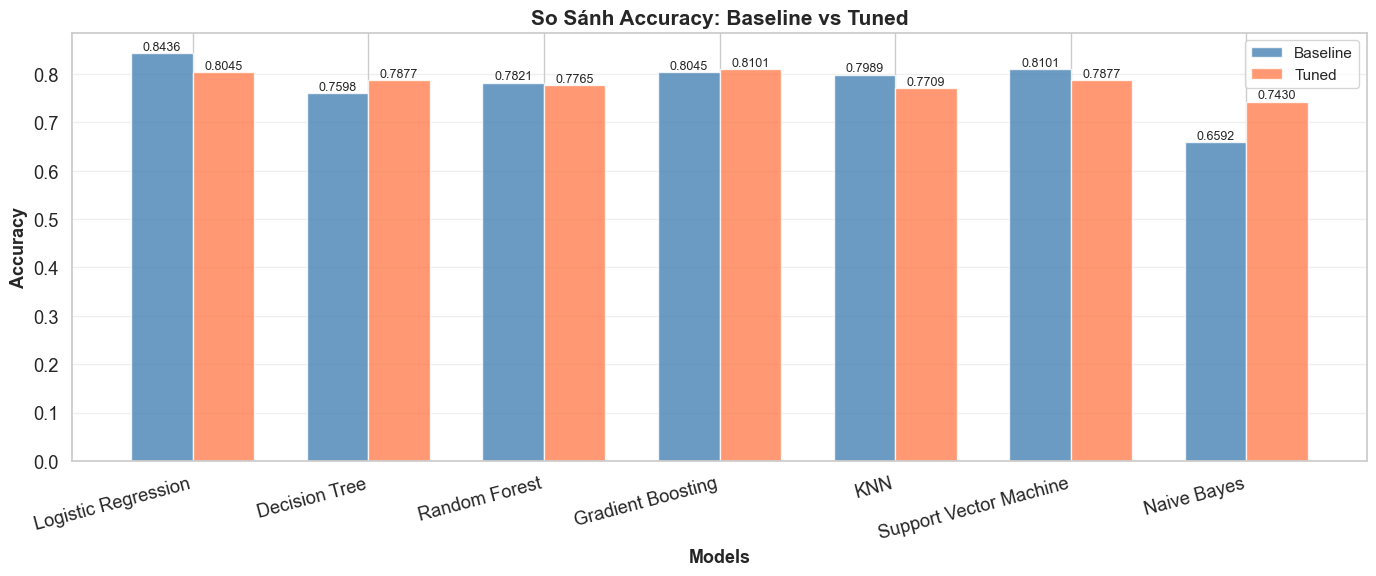

In [51]:
# Bi·ªÉu ƒë·ªì so s√°nh Accuracy: Baseline vs Tuned
fig, ax = plt.subplots(figsize=(14, 6))

models_list = df_comparison["Model"].tolist()
x = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    df_comparison["Baseline Accuracy"],
    width,
    label="Baseline",
    color="steelblue",
    alpha=0.8,
)
bars2 = ax.bar(
    x + width / 2,
    df_comparison["Tuned Accuracy"],
    width,
    label="Tuned",
    color="coral",
    alpha=0.8,
)

# Th√™m gi√° tr·ªã l√™n tr√™n m·ªói c·ªôt
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("Accuracy", fontsize=13, fontweight="bold")
ax.set_title("So S√°nh Accuracy: Baseline vs Tuned", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### üìà Bi·ªÉu ƒê·ªì 2: So S√°nh F1-Score


Text(-0.175, 0.8431298534814802, '0.8431')

Text(0.825, 0.762007066587921, '0.7620')

Text(1.825, 0.778803968880293, '0.7788')

Text(2.825, 0.801490741302827, '0.8015')

Text(3.825, 0.798309811619046, '0.7983')

Text(4.825, 0.8095148220846544, '0.8095')

Text(5.825, 0.6583030828704868, '0.6583')

Text(0.175, 0.8036119392183224, '0.8036')

Text(1.175, 0.7798155016196422, '0.7798')

Text(2.175, 0.772665168812242, '0.7727')

Text(3.175, 0.8059232554512847, '0.8059')

Text(4.175, 0.770631984047481, '0.7706')

Text(5.175, 0.7840319103716299, '0.7840')

Text(6.175, 0.7461668560704499, '0.7462')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'So S√°nh F1-Score: Baseline vs Tuned')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

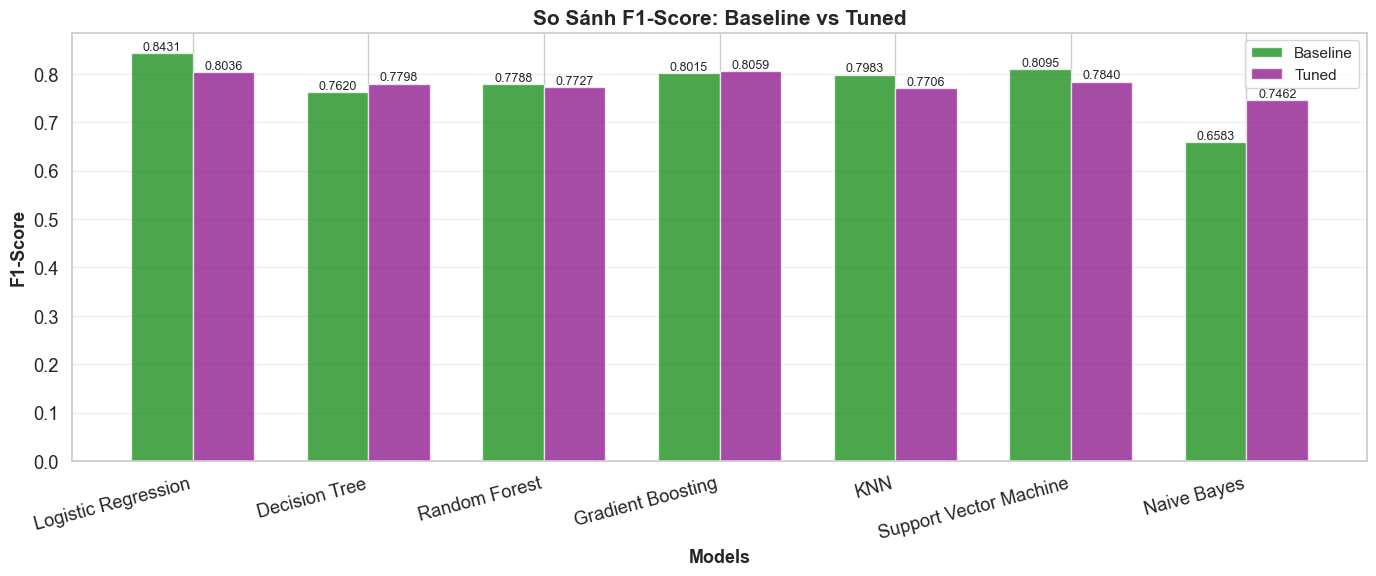

In [52]:
# Bi·ªÉu ƒë·ªì so s√°nh F1-Score: Baseline vs Tuned
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(
    x - width / 2,
    df_comparison["Baseline F1"],
    width,
    label="Baseline",
    color="green",
    alpha=0.7,
)
bars2 = ax.bar(
    x + width / 2,
    df_comparison["Tuned F1"],
    width,
    label="Tuned",
    color="purple",
    alpha=0.7,
)

# Th√™m gi√° tr·ªã l√™n tr√™n m·ªói c·ªôt
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:.4f}",
            ha="center",
            va="bottom",
            fontsize=9,
        )

ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("F1-Score", fontsize=13, fontweight="bold")
ax.set_title("So S√°nh F1-Score: Baseline vs Tuned", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### üìà Bi·ªÉu ƒê·ªì 3: M·ª©c ƒê·ªô C·∫£i Thi·ªán (%)


Text(-0.175, -3.9106145251396662, '-3.91%')

Text(0.825, 2.7932960893854775, '+2.79%')

Text(1.825, -0.5586592178770888, '-0.56%')

Text(2.825, 0.5586592178770888, '+0.56%')

Text(3.825, -2.7932960893854775, '-2.79%')

Text(4.825, -2.2346368715083775, '-2.23%')

Text(5.825, 8.379888268156432, '+8.38%')

Text(0.175, -3.951791426315776, '-3.95%')

Text(1.175, 1.7808435031721248, '+1.78%')

Text(2.175, -0.6138800068051009, '-0.61%')

Text(3.175, 0.4432514148457689, '+0.44%')

Text(4.175, -2.7677827571565006, '-2.77%')

Text(5.175, -2.5482911713024525, '-2.55%')

Text(6.175, 8.786377319996308, '+8.79%')

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Improvement (%)')

Text(0.5, 1.0, 'M·ª©c ƒê·ªô C·∫£i Thi·ªán Sau Tuning (%)')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Decision Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'Gradient Boosting'),
 Text(4, 0, 'KNN'),
 Text(5, 0, 'Support Vector Machine'),
 Text(6, 0, 'Naive Bayes')]

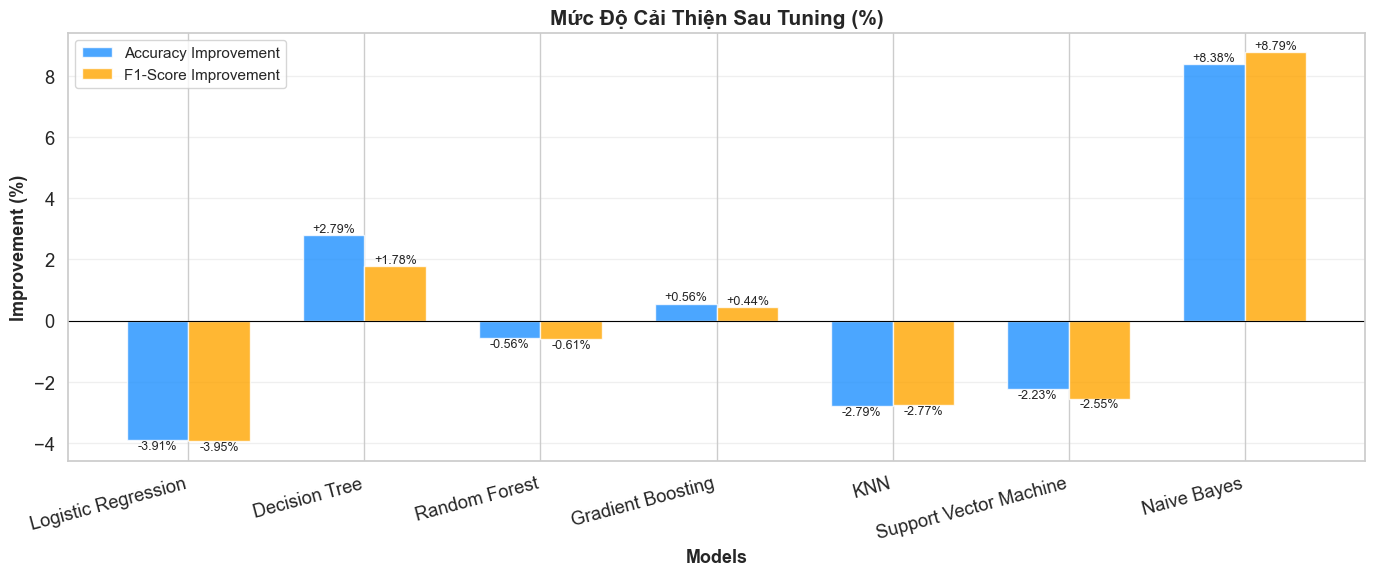

In [53]:
# Bi·ªÉu ƒë·ªì m·ª©c ƒë·ªô c·∫£i thi·ªán (ph·∫ßn trƒÉm)
fig, ax = plt.subplots(figsize=(14, 6))

x = np.arange(len(models_list))
width = 0.35

# Chuy·ªÉn ƒë·ªïi sang ph·∫ßn trƒÉm
acc_improvement_pct = df_comparison["Accuracy Improvement"] * 100
f1_improvement_pct = df_comparison["F1 Improvement"] * 100

bars1 = ax.bar(
    x - width / 2,
    acc_improvement_pct,
    width,
    label="Accuracy Improvement",
    color="dodgerblue",
    alpha=0.8,
)
bars2 = ax.bar(
    x + width / 2,
    f1_improvement_pct,
    width,
    label="F1-Score Improvement",
    color="orange",
    alpha=0.8,
)

# Th√™m gi√° tr·ªã l√™n tr√™n m·ªói c·ªôt
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{height:+.2f}%",
            ha="center",
            va="bottom" if height >= 0 else "top",
            fontsize=9,
        )

ax.axhline(y=0, color="black", linestyle="-", linewidth=0.8)
ax.set_xlabel("Models", fontsize=13, fontweight="bold")
ax.set_ylabel("Improvement (%)", fontsize=13, fontweight="bold")
ax.set_title("M·ª©c ƒê·ªô C·∫£i Thi·ªán Sau Tuning (%)", fontsize=15, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(models_list, rotation=15, ha="right")
ax.legend(fontsize=11)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


### üìà Bi·ªÉu ƒê·ªì 4: So S√°nh T·∫•t C·∫£ Metrics (Heatmap)


<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Baseline Models - All Metrics')

Text(0.5, 29.249999999999986, 'Models')

Text(188.25, 0.5, 'Metrics')

<Axes: xlabel='Model'>

Text(0.5, 1.0, 'Tuned Models - All Metrics')

Text(0.5, 29.249999999999986, 'Models')

Text(949.1590909090908, 0.5, 'Metrics')

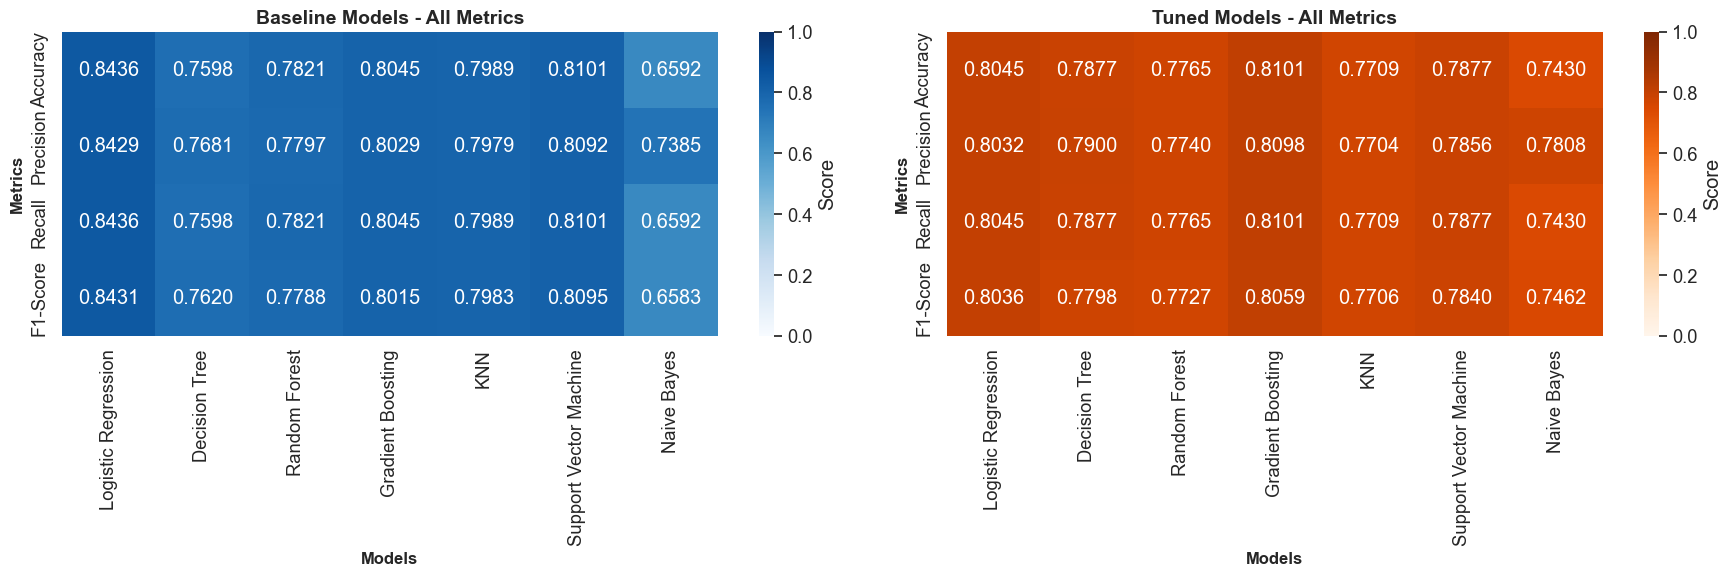

In [54]:
# T·∫°o heatmap ƒë·ªÉ so s√°nh t·∫•t c·∫£ metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Baseline Heatmap
baseline_metrics = df_comparison[
    [
        "Model",
        "Baseline Accuracy",
        "Baseline Precision",
        "Baseline Recall",
        "Baseline F1",
    ]
].set_index("Model")
baseline_metrics.columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

sns.heatmap(
    baseline_metrics.T,
    annot=True,
    fmt=".4f",
    cmap="Blues",
    cbar_kws={"label": "Score"},
    ax=ax1,
    vmin=0,
    vmax=1,
)
ax1.set_title("Baseline Models - All Metrics", fontsize=14, fontweight="bold")
ax1.set_xlabel("Models", fontsize=12, fontweight="bold")
ax1.set_ylabel("Metrics", fontsize=12, fontweight="bold")

# Tuned Heatmap
tuned_metrics = df_comparison[
    ["Model", "Tuned Accuracy", "Tuned Precision", "Tuned Recall", "Tuned F1"]
].set_index("Model")
tuned_metrics.columns = ["Accuracy", "Precision", "Recall", "F1-Score"]

sns.heatmap(
    tuned_metrics.T,
    annot=True,
    fmt=".4f",
    cmap="Oranges",
    cbar_kws={"label": "Score"},
    ax=ax2,
    vmin=0,
    vmax=1,
)
ax2.set_title("Tuned Models - All Metrics", fontsize=14, fontweight="bold")
ax2.set_xlabel("Models", fontsize=12, fontweight="bold")
ax2.set_ylabel("Metrics", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


### üìà Bi·ªÉu ƒê·ªì 5: So S√°nh Chi Ti·∫øt T·ª´ng Model


Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Logistic Regression')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Decision Tree')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Random Forest')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Gradient Boosting')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'KNN')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Support Vector Machine')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Naive Bayes')

[Text(0, 0, 'Accuracy'),
 Text(1, 0, 'Precision'),
 Text(2, 0, 'Recall'),
 Text(3, 0, 'F1')]

(0.0, 1.0)

Text(0.5, 1.0, 'So S√°nh Chi Ti·∫øt T·∫•t C·∫£ Metrics Cho T·ª´ng Model')

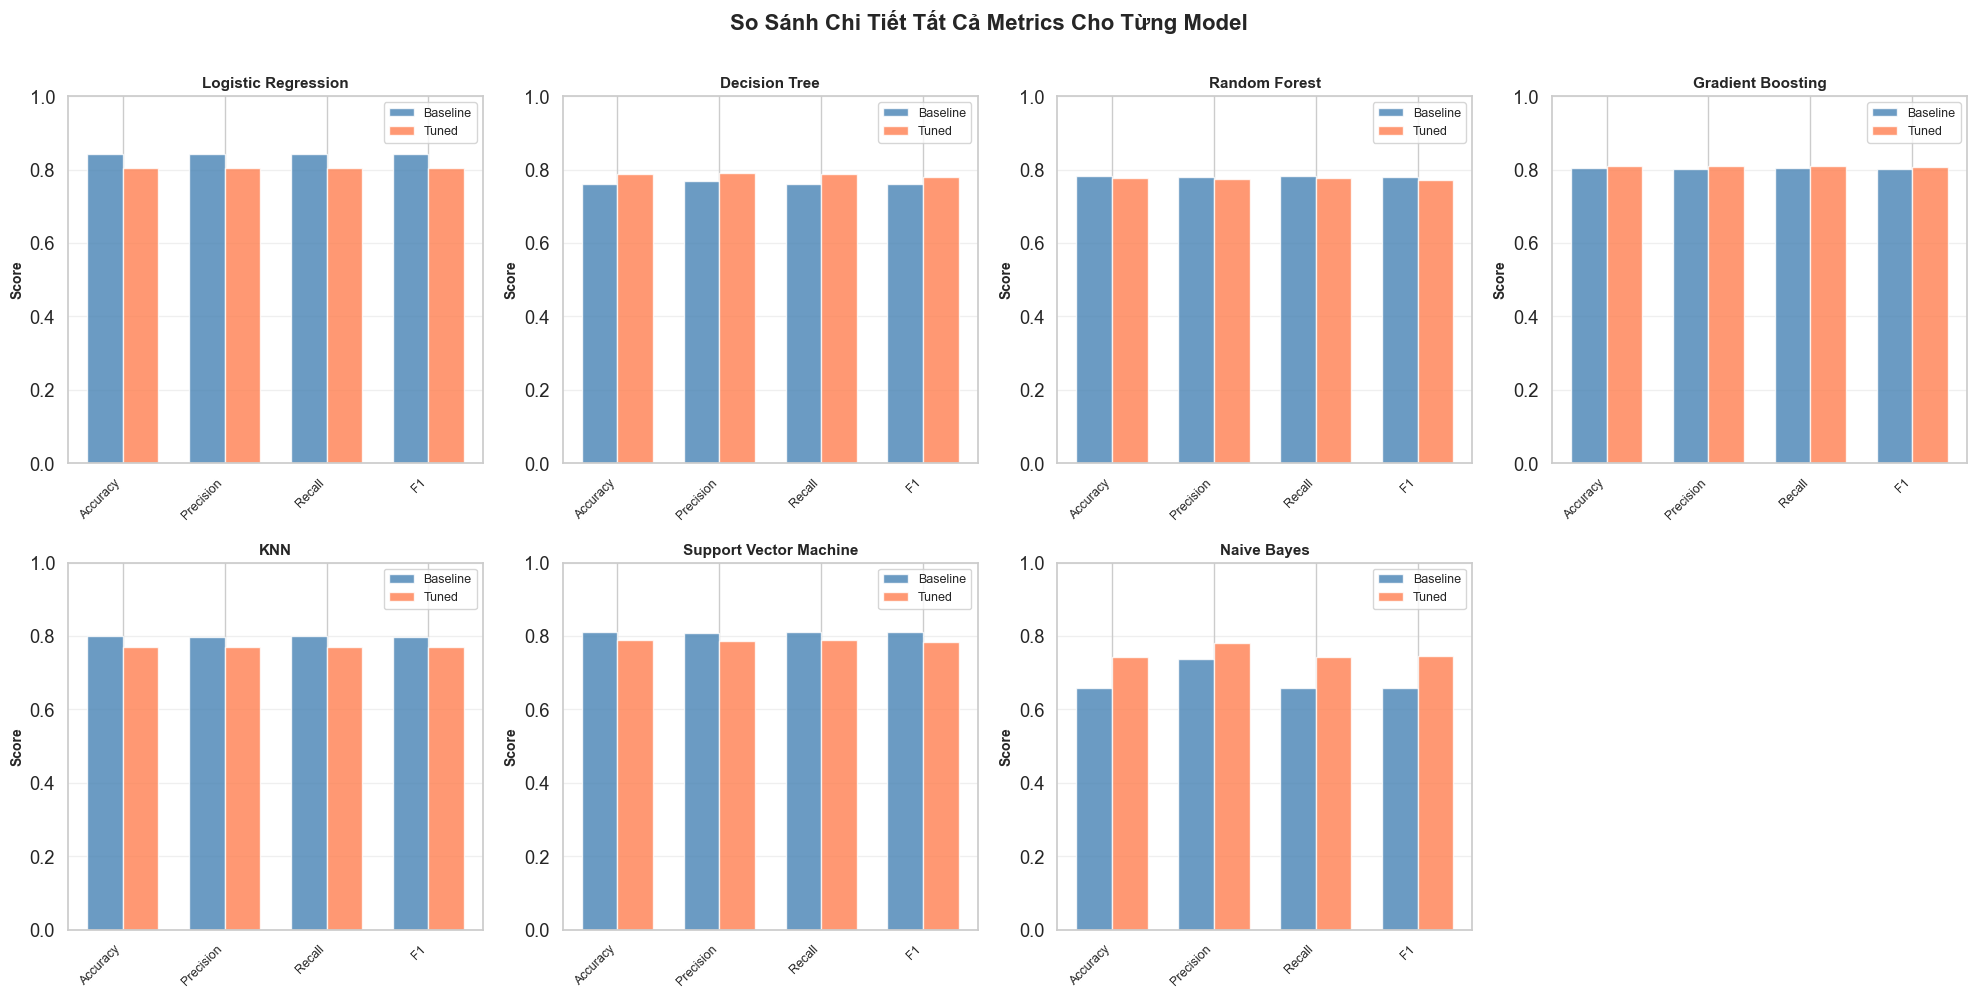

In [55]:
# So s√°nh chi ti·∫øt t·ª´ng model v·ªõi 4 metrics
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, model_name in enumerate(models_list):
    if idx < len(axes):
        ax = axes[idx]

        # L·∫•y d·ªØ li·ªáu cho model n√†y
        model_data = df_comparison[df_comparison["Model"] == model_name].iloc[0]

        metrics = ["Accuracy", "Precision", "Recall", "F1"]
        baseline_vals = [
            model_data["Baseline Accuracy"],
            model_data["Baseline Precision"],
            model_data["Baseline Recall"],
            model_data["Baseline F1"],
        ]
        tuned_vals = [
            model_data["Tuned Accuracy"],
            model_data["Tuned Precision"],
            model_data["Tuned Recall"],
            model_data["Tuned F1"],
        ]

        x_pos = np.arange(len(metrics))
        width = 0.35

        bars1 = ax.bar(
            x_pos - width / 2,
            baseline_vals,
            width,
            label="Baseline",
            color="steelblue",
            alpha=0.8,
        )
        bars2 = ax.bar(
            x_pos + width / 2,
            tuned_vals,
            width,
            label="Tuned",
            color="coral",
            alpha=0.8,
        )

        ax.set_ylabel("Score", fontsize=10, fontweight="bold")
        ax.set_title(f"{model_name}", fontsize=11, fontweight="bold")
        ax.set_xticks(x_pos)
        ax.set_xticklabels(metrics, rotation=45, ha="right", fontsize=9)
        ax.set_ylim([0, 1])
        ax.legend(fontsize=9)
        ax.grid(axis="y", alpha=0.3)

# ·∫®n subplot th·ª´a n·∫øu c√≥
for idx in range(len(models_list), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(
    "So S√°nh Chi Ti·∫øt T·∫•t C·∫£ Metrics Cho T·ª´ng Model",
    fontsize=16,
    fontweight="bold",
    y=1.00,
)
plt.tight_layout()
plt.show()


### üèÜ T·ªïng K·∫øt v√† Model T·ªët Nh·∫•t


In [56]:
# T√¨m model t·ªët nh·∫•t
print("\n" + "=" * 100)
print("üèÜ T·ªîNG K·∫æT V√Ä X·∫æP H·∫†NG")
print("=" * 100)

# S·∫Øp x·∫øp theo Tuned F1-Score
df_sorted = df_comparison.sort_values("Tuned F1", ascending=False)

print("\nüìä X·∫æP H·∫†NG THEO F1-SCORE (SAU TUNING):")
print("-" * 100)
for idx, row in df_sorted.iterrows():
    rank = df_sorted.index.get_loc(idx) + 1
    print(
        f"{rank}. {row['Model']:30s} | F1: {row['Tuned F1']:.4f} | Accuracy: {row['Tuned Accuracy']:.4f} | C·∫£i thi·ªán: {row['F1 Improvement']*100:+.2f}%"
    )

# Model t·ªët nh·∫•t
best_model_row = df_sorted.iloc[0]
print("\n" + "=" * 100)
print(f"ü•á MODEL T·ªêT NH·∫§T: {best_model_row['Model']}")
print("=" * 100)
print(f"  üìà Metrics sau Tuning:")
print(f"     ‚Ä¢ Accuracy:  {best_model_row['Tuned Accuracy']:.4f}")
print(f"     ‚Ä¢ Precision: {best_model_row['Tuned Precision']:.4f}")
print(f"     ‚Ä¢ Recall:    {best_model_row['Tuned Recall']:.4f}")
print(f"     ‚Ä¢ F1-Score:  {best_model_row['Tuned F1']:.4f}")
print(f"\n  üìä So v·ªõi Baseline:")
print(f"     ‚Ä¢ Accuracy c·∫£i thi·ªán:  {best_model_row['Accuracy Improvement']*100:+.2f}%")
print(f"     ‚Ä¢ F1-Score c·∫£i thi·ªán:  {best_model_row['F1 Improvement']*100:+.2f}%")

# Model c·∫£i thi·ªán nhi·ªÅu nh·∫•t
df_sorted_improvement = df_comparison.sort_values("F1 Improvement", ascending=False)
most_improved = df_sorted_improvement.iloc[0]

print("\n" + "=" * 100)
print(f"üöÄ MODEL C·∫¢I THI·ªÜN NHI·ªÄU NH·∫§T: {most_improved['Model']}")
print("=" * 100)
print(f"  ‚Ä¢ F1-Score c·∫£i thi·ªán: {most_improved['F1 Improvement']*100:+.2f}%")
print(f"  ‚Ä¢ Accuracy c·∫£i thi·ªán: {most_improved['Accuracy Improvement']*100:+.2f}%")
print(
    f"  ‚Ä¢ Baseline F1: {most_improved['Baseline F1']:.4f} ‚Üí Tuned F1: {most_improved['Tuned F1']:.4f}"
)

print("\n" + "=" * 100)
print("‚úÖ HO√ÄN T·∫§T TO√ÄN B·ªò QU√Å TR√åNH TRAIN V√Ä SO S√ÅNH!")
print("=" * 100)



üèÜ T·ªîNG K·∫æT V√Ä X·∫æP H·∫†NG

üìä X·∫æP H·∫†NG THEO F1-SCORE (SAU TUNING):
----------------------------------------------------------------------------------------------------
1. Gradient Boosting              | F1: 0.8059 | Accuracy: 0.8101 | C·∫£i thi·ªán: +0.44%
2. Logistic Regression            | F1: 0.8036 | Accuracy: 0.8045 | C·∫£i thi·ªán: -3.95%
3. Support Vector Machine         | F1: 0.7840 | Accuracy: 0.7877 | C·∫£i thi·ªán: -2.55%
4. Decision Tree                  | F1: 0.7798 | Accuracy: 0.7877 | C·∫£i thi·ªán: +1.78%
5. Random Forest                  | F1: 0.7727 | Accuracy: 0.7765 | C·∫£i thi·ªán: -0.61%
6. KNN                            | F1: 0.7706 | Accuracy: 0.7709 | C·∫£i thi·ªán: -2.77%
7. Naive Bayes                    | F1: 0.7462 | Accuracy: 0.7430 | C·∫£i thi·ªán: +8.79%

ü•á MODEL T·ªêT NH·∫§T: Gradient Boosting
  üìà Metrics sau Tuning:
     ‚Ä¢ Accuracy:  0.8101
     ‚Ä¢ Precision: 0.8098
     ‚Ä¢ Recall:    0.8101
     ‚Ä¢ F1-Score:  0.8059

  üìä

## üéØ Hu·∫•n Luy·ªán L·∫°i Model T·ªët Nh·∫•t v√† D·ª± ƒêo√°n Tr√™n Test Set


In [57]:
# L·∫•y t√™n model t·ªët nh·∫•t t·ª´ k·∫øt qu·∫£ tuning
best_model_name = df_sorted.iloc[0]["Model"]
best_tuned_params = next(
    item["Best Params"]
    for item in tuned_evaluation_log
    if item["Model"] == best_model_name
)

print("=" * 100)
print(f"üéØ HU·∫§N LUY·ªÜN L·∫†I M√î H√åNH T·ªêT NH·∫§T: {best_model_name}")
print("=" * 100)
print(f"üìã S·ª≠ d·ª•ng c√°c tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c t·ª´ GridSearchCV:")
print(f"   {best_tuned_params}")
print(f"\nüîÑ S·ª≠ d·ª•ng 100% d·ªØ li·ªáu train (df_train_full) ƒë·ªÉ hu·∫•n luy·ªán l·∫°i...")
print(f"   K√≠ch th∆∞·ªõc d·ªØ li·ªáu: {df_train_full.shape}")

# 1. L·∫•y model ƒë√£ ƒë∆∞·ª£c tune t·ªët nh·∫•t t·ª´ trained_models
best_model_final = trained_models[best_model_name]

# 2. Chu·∫©n b·ªã TO√ÄN B·ªò d·ªØ li·ªáu train
# X v√† y ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü cell tr∆∞·ªõc (t·ª´ df_train_full)
print(f"\n‚öôÔ∏è Chu·∫©n h√≥a (scaling) to√†n b·ªô d·ªØ li·ªáu train...")
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X)

# 3. Hu·∫•n luy·ªán l·∫°i tr√™n to√†n b·ªô d·ªØ li·ªáu
print(f"üöÄ B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán l·∫°i tr√™n to√†n b·ªô {X_full_scaled.shape[0]} samples...")
start_time = time.time()
best_model_final.fit(X_full_scaled, y)
training_time = time.time() - start_time

print(f"‚úÖ Hu·∫•n luy·ªán l·∫°i ho√†n t·∫•t trong {training_time:.4f} gi√¢y!")

# 4. Chu·∫©n b·ªã t·∫≠p test cu·ªëi c√πng
print(f"\nüìä Chu·∫©n b·ªã d·ªØ li·ªáu test cu·ªëi c√πng...")
print(f"   K√≠ch th∆∞·ªõc test: {X_test_final.shape}")
X_test_final_scaled_final = scaler_final.transform(X_test_final)

# 5. D·ª± ƒëo√°n tr√™n t·∫≠p test cu·ªëi c√πng
print(f"\nüîÆ ƒêang d·ª± ƒëo√°n tr√™n t·∫≠p test_cleaned.csv...")
final_predictions = best_model_final.predict(X_test_final_scaled_final)

print(f"‚úÖ D·ª± ƒëo√°n ho√†n t·∫•t!")
print(f"\nüìà Th·ªëng k√™ d·ª± ƒëo√°n:")
unique, counts = np.unique(final_predictions, return_counts=True)
for val, count in zip(unique, counts):
    print(f"   Class {val}: {count} samples ({count/len(final_predictions)*100:.2f}%)")

print("\n" + "=" * 100)


üéØ HU·∫§N LUY·ªÜN L·∫†I M√î H√åNH T·ªêT NH·∫§T: Gradient Boosting
üìã S·ª≠ d·ª•ng c√°c tham s·ªë t·ªët nh·∫•t ƒë√£ t√¨m ƒë∆∞·ª£c t·ª´ GridSearchCV:
   {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}

üîÑ S·ª≠ d·ª•ng 100% d·ªØ li·ªáu train (df_train_full) ƒë·ªÉ hu·∫•n luy·ªán l·∫°i...
   K√≠ch th∆∞·ªõc d·ªØ li·ªáu: (891, 23)

‚öôÔ∏è Chu·∫©n h√≥a (scaling) to√†n b·ªô d·ªØ li·ªáu train...
üöÄ B·∫Øt ƒë·∫ßu hu·∫•n luy·ªán l·∫°i tr√™n to√†n b·ªô 891 samples...


GradientBoostingClassifier(learning_rate=0.01, n_estimators=200,
                           random_state=42)

‚úÖ Hu·∫•n luy·ªán l·∫°i ho√†n t·∫•t trong 0.2117 gi√¢y!

üìä Chu·∫©n b·ªã d·ªØ li·ªáu test cu·ªëi c√πng...
   K√≠ch th∆∞·ªõc test: (418, 22)

üîÆ ƒêang d·ª± ƒëo√°n tr√™n t·∫≠p test_cleaned.csv...
‚úÖ D·ª± ƒëo√°n ho√†n t·∫•t!

üìà Th·ªëng k√™ d·ª± ƒëo√°n:
   Class 0: 266 samples (63.64%)
   Class 1: 152 samples (36.36%)



### üíæ L∆∞u K·∫øt Qu·∫£ D·ª± ƒêo√°n


In [58]:
# T·∫°o DataFrame k·∫øt qu·∫£ d·ª± ƒëo√°n
# Gi·∫£ s·ª≠ df_test_final c√≥ c·ªôt PassengerId (th∆∞·ªùng c√≥ trong b√†i to√°n Titanic)
# N·∫øu kh√¥ng c√≥, ch√∫ng ta s·∫Ω t·∫°o index t·ª´ 0

if "PassengerId" in df_test_final.columns:
    submission_df = pd.DataFrame(
        {"PassengerId": df_test_final["PassengerId"], "Survived": final_predictions}
    )
else:
    submission_df = pd.DataFrame(
        {"Index": range(len(final_predictions)), "Survived": final_predictions}
    )

# L∆∞u file submission
output_filename = f'submission_{best_model_name.replace(" ", "_").lower()}_tuned.csv'
submission_df.to_csv(output_filename, index=False)

print("=" * 100)
print("üíæ L∆ØU K·∫æT QU·∫¢ D·ª± ƒêO√ÅN")
print("=" * 100)
print(f"‚úÖ ƒê√£ l∆∞u file: {output_filename}")
print(f"\nüìã Preview 10 d·ª± ƒëo√°n ƒë·∫ßu ti√™n:")
print(submission_df.head(10).to_string(index=False))
print(f"\nüìä T·ªïng s·ªë d·ª± ƒëo√°n: {len(submission_df)}")
print("=" * 100)


üíæ L∆ØU K·∫æT QU·∫¢ D·ª± ƒêO√ÅN
‚úÖ ƒê√£ l∆∞u file: submission_gradient_boosting_tuned.csv

üìã Preview 10 d·ª± ƒëo√°n ƒë·∫ßu ti√™n:
 PassengerId  Survived
         892         0
         893         1
         894         0
         895         0
         896         1
         897         0
         898         1
         899         0
         900         1
         901         0

üìä T·ªïng s·ªë d·ª± ƒëo√°n: 418


### üìä Tr·ª±c Quan H√≥a K·∫øt Qu·∫£ D·ª± ƒêo√°n


Text(0.0, 266, '266\n(63.6%)')

Text(1.0, 152, '152\n(36.4%)')

Text(0.5, 0, 'Predicted Class')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Ph√¢n B·ªë D·ª± ƒêo√°n Tr√™n Test Set\n(Model: Gradient Boosting)')

[Text(0, 0, 'Not Survived (0)'), Text(1, 0, 'Survived (1)')]

Text(-0.175, 549, '549')

Text(0.825, 342, '342')

Text(0.175, 266, '266')

Text(1.175, 152, '152')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'So S√°nh Ph√¢n B·ªë: Train vs Test Predictions')

[Text(0, 0, 'Not Survived (0)'), Text(1, 0, 'Survived (1)')]

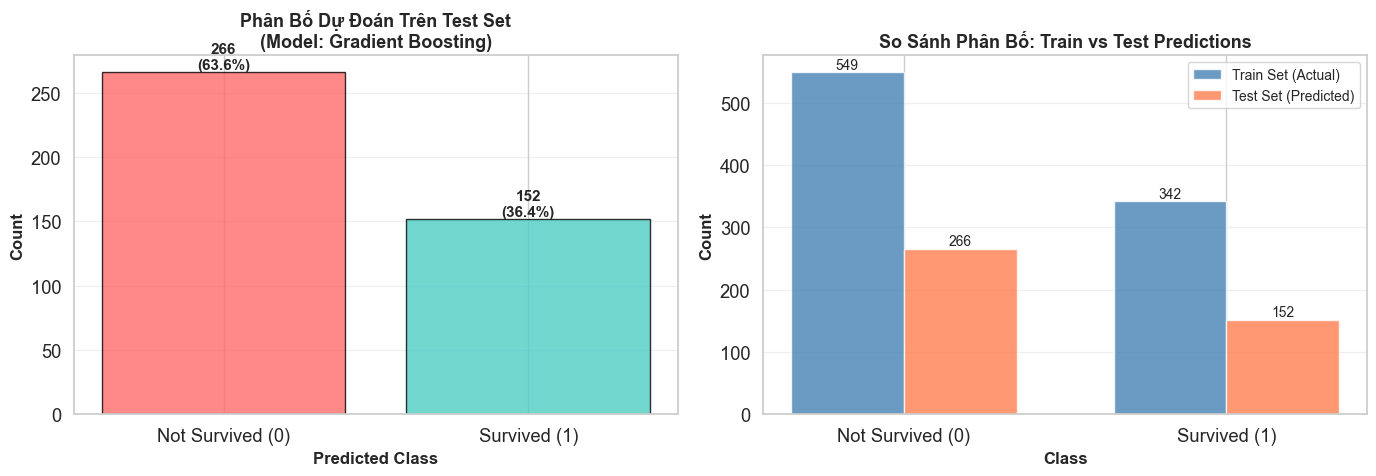


‚úÖ ƒê√£ t·∫°o bi·ªÉu ƒë·ªì tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± ƒëo√°n!


In [59]:
# Bi·ªÉu ƒë·ªì ph√¢n b·ªë d·ª± ƒëo√°n tr√™n test set
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bi·ªÉu ƒë·ªì 1: Ph√¢n b·ªë d·ª± ƒëo√°n test set
ax1 = axes[0]
pred_counts = pd.Series(final_predictions).value_counts().sort_index()
colors = ["#FF6B6B", "#4ECDC4"]
bars = ax1.bar(
    pred_counts.index, pred_counts.values, color=colors, alpha=0.8, edgecolor="black"
)

for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{int(height)}\n({height/len(final_predictions)*100:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

ax1.set_xlabel("Predicted Class", fontsize=12, fontweight="bold")
ax1.set_ylabel("Count", fontsize=12, fontweight="bold")
ax1.set_title(
    f"Ph√¢n B·ªë D·ª± ƒêo√°n Tr√™n Test Set\n(Model: {best_model_name})",
    fontsize=13,
    fontweight="bold",
)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Not Survived (0)", "Survived (1)"])
ax1.grid(axis="y", alpha=0.3)

# Bi·ªÉu ƒë·ªì 2: So s√°nh ph√¢n b·ªë train vs test prediction
ax2 = axes[1]
train_counts = y.value_counts().sort_index()

x = np.arange(2)
width = 0.35

bars1 = ax2.bar(
    x - width / 2,
    train_counts.values,
    width,
    label="Train Set (Actual)",
    color="steelblue",
    alpha=0.8,
)
bars2 = ax2.bar(
    x + width / 2,
    pred_counts.values,
    width,
    label="Test Set (Predicted)",
    color="coral",
    alpha=0.8,
)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{int(height)}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

ax2.set_xlabel("Class", fontsize=12, fontweight="bold")
ax2.set_ylabel("Count", fontsize=12, fontweight="bold")
ax2.set_title(
    "So S√°nh Ph√¢n B·ªë: Train vs Test Predictions", fontsize=13, fontweight="bold"
)
ax2.set_xticks(x)
ax2.set_xticklabels(["Not Survived (0)", "Survived (1)"])
ax2.legend(fontsize=10)
ax2.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ ƒê√£ t·∫°o bi·ªÉu ƒë·ªì tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± ƒëo√°n!")


### üéâ T·ªïng K·∫øt Cu·ªëi C√πng


In [60]:
print("\n" + "=" * 120)
print(" " * 40 + "üéâ T·ªîNG K·∫æT TO√ÄN B·ªò QU√Å TR√åNH üéâ")
print("=" * 120)

print("\nüìã C√ÅC B∆Ø·ªöC ƒê√É TH·ª∞C HI·ªÜN:")
print("   1Ô∏è‚É£  Load v√† chu·∫©n b·ªã d·ªØ li·ªáu t·ª´ final_data")
print("   2Ô∏è‚É£  Chia d·ªØ li·ªáu train/validation (80/20) v·ªõi stratification")
print("   3Ô∏è‚É£  Chu·∫©n h√≥a (scaling) d·ªØ li·ªáu v·ªõi StandardScaler")
print("   4Ô∏è‚É£  Hu·∫•n luy·ªán 7 models v·ªõi c·∫•u h√¨nh m·∫∑c ƒë·ªãnh (Baseline)")
print("   5Ô∏è‚É£  T·ªëi ∆∞u h√≥a si√™u tham s·ªë v·ªõi GridSearchCV (5-fold CV)")
print("   6Ô∏è‚É£  So s√°nh hi·ªáu qu·∫£ Baseline vs Tuned v·ªõi 5 bi·ªÉu ƒë·ªì chi ti·∫øt")
print("   7Ô∏è‚É£  Ch·ªçn model t·ªët nh·∫•t v√† hu·∫•n luy·ªán l·∫°i tr√™n 100% d·ªØ li·ªáu train")
print("   8Ô∏è‚É£  D·ª± ƒëo√°n tr√™n t·∫≠p test cu·ªëi c√πng v√† l∆∞u k·∫øt qu·∫£")

print("\n" + "=" * 120)
print("üèÜ K·∫æT QU·∫¢ CU·ªêI C√ôNG:")
print("=" * 120)
print(f"‚ú® Model ƒë∆∞·ª£c ch·ªçn:          {best_model_name}")
print(f"üìä Validation Accuracy:      {best_model_row['Tuned Accuracy']:.4f}")
print(f"üìä Validation F1-Score:      {best_model_row['Tuned F1']:.4f}")
print(f"üìä Validation Precision:     {best_model_row['Tuned Precision']:.4f}")
print(f"üìä Validation Recall:        {best_model_row['Tuned Recall']:.4f}")
print(f"\nüìà C·∫£i thi·ªán so v·ªõi Baseline:")
print(f"   ‚Ä¢ Accuracy:  {best_model_row['Accuracy Improvement']*100:+.2f}%")
print(f"   ‚Ä¢ F1-Score:  {best_model_row['F1 Improvement']*100:+.2f}%")

print(f"\nüíæ File k·∫øt qu·∫£:             {output_filename}")
print(f"üìù T·ªïng s·ªë d·ª± ƒëo√°n:          {len(final_predictions)} samples")

# T√≠nh t·ª∑ l·ªá s·ªëng s√≥t d·ª± ƒëo√°n
survival_rate = (final_predictions == 1).sum() / len(final_predictions) * 100
print(f"üö¢ T·ª∑ l·ªá s·ªëng s√≥t d·ª± ƒëo√°n:   {survival_rate:.2f}%")

print("\n" + "=" * 120)
print("‚úÖ HO√ÄN T·∫§T TO√ÄN B·ªò QU√Å TR√åNH MACHINE LEARNING PIPELINE!")
print("=" * 120)

# L∆∞u t·ªïng k·∫øt v√†o file text
summary_text = f"""
{'='*100}
T·ªîNG K·∫æT QU√Å TR√åNH MACHINE LEARNING - TITANIC SURVIVAL PREDICTION
{'='*100}

1. DATASET:
   - Train samples: {df_train_full.shape[0]}
   - Test samples:  {df_test_final.shape[0]}
   - Features:      {df_train_full.shape[1] - 1}

2. MODELS EVALUATED:
   {', '.join([m for m in models.keys()])}

3. BEST MODEL:
   - Model:             {best_model_name}
   - Best Parameters:   {best_tuned_params}
   - Validation Metrics:
     * Accuracy:        {best_model_row['Tuned Accuracy']:.4f}
     * Precision:       {best_model_row['Tuned Precision']:.4f}
     * Recall:          {best_model_row['Tuned Recall']:.4f}
     * F1-Score:        {best_model_row['Tuned F1']:.4f}

4. IMPROVEMENTS:
   - Accuracy Improvement:  {best_model_row['Accuracy Improvement']*100:+.2f}%
   - F1-Score Improvement:  {best_model_row['F1 Improvement']*100:+.2f}%

5. FINAL PREDICTIONS:
   - Output file:           {output_filename}
   - Total predictions:     {len(final_predictions)}
   - Predicted survival:    {(final_predictions == 1).sum()} ({survival_rate:.2f}%)
   - Predicted death:       {(final_predictions == 0).sum()} ({100-survival_rate:.2f}%)

{'='*100}
Completed at: {time.strftime('%Y-%m-%d %H:%M:%S')}
{'='*100}
"""

with open("model_training_summary.txt", "w", encoding="utf-8") as f:
    f.write(summary_text)

print("\nüíæ ƒê√£ l∆∞u t·ªïng k·∫øt chi ti·∫øt v√†o file: model_training_summary.txt")



                                        üéâ T·ªîNG K·∫æT TO√ÄN B·ªò QU√Å TR√åNH üéâ

üìã C√ÅC B∆Ø·ªöC ƒê√É TH·ª∞C HI·ªÜN:
   1Ô∏è‚É£  Load v√† chu·∫©n b·ªã d·ªØ li·ªáu t·ª´ final_data
   2Ô∏è‚É£  Chia d·ªØ li·ªáu train/validation (80/20) v·ªõi stratification
   3Ô∏è‚É£  Chu·∫©n h√≥a (scaling) d·ªØ li·ªáu v·ªõi StandardScaler
   4Ô∏è‚É£  Hu·∫•n luy·ªán 7 models v·ªõi c·∫•u h√¨nh m·∫∑c ƒë·ªãnh (Baseline)
   5Ô∏è‚É£  T·ªëi ∆∞u h√≥a si√™u tham s·ªë v·ªõi GridSearchCV (5-fold CV)
   6Ô∏è‚É£  So s√°nh hi·ªáu qu·∫£ Baseline vs Tuned v·ªõi 5 bi·ªÉu ƒë·ªì chi ti·∫øt
   7Ô∏è‚É£  Ch·ªçn model t·ªët nh·∫•t v√† hu·∫•n luy·ªán l·∫°i tr√™n 100% d·ªØ li·ªáu train
   8Ô∏è‚É£  D·ª± ƒëo√°n tr√™n t·∫≠p test cu·ªëi c√πng v√† l∆∞u k·∫øt qu·∫£

üèÜ K·∫æT QU·∫¢ CU·ªêI C√ôNG:
‚ú® Model ƒë∆∞·ª£c ch·ªçn:          Gradient Boosting
üìä Validation Accuracy:      0.8101
üìä Validation F1-Score:      0.8059
üìä Validation Precision:     0.8098
üìä Validation Recall:        0.8101

üìà C·∫£i thi·ªán so v·ªõ

1310


üíæ ƒê√£ l∆∞u t·ªïng k·∫øt chi ti·∫øt v√†o file: model_training_summary.txt
